In [1]:
import tensorflow as tf

C:\Users\uditi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001735EBB1518>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001736354C630>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001736354C668>)

In [5]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [7]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

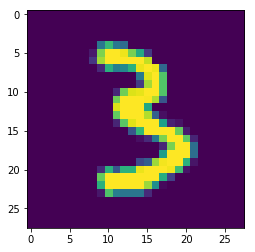

In [10]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [11]:
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval())

[[-1.1375554  -0.42306536 -0.5100057  ...  0.552771    0.23662882
   1.0592213 ]
 [ 0.42061767  2.4780831  -0.9566628  ... -1.9168979   1.3125565
   0.55168486]
 [ 0.56727296  0.2587776  -0.72265977 ...  0.01058421  1.023042
  -0.90566707]
 ...
 [ 0.23668137  0.40373877  1.3828756  ...  0.23288533 -0.5818824
  -2.2675958 ]
 [ 0.11591578  0.432275   -0.70390284 ...  0.2801221  -0.46025768
  -0.89538115]
 [-0.10721255  0.62231845  1.2059642  ... -0.48912024 -1.0454603
   0.45298555]]


In [12]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [13]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [14]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [15]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [16]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
batch_size = 100
for i in range(40):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

23567.033822774887
4451.313903779043
2360.9327367108513
1697.6925230759505
1307.4802451651824
1117.9366801492304
985.5709150515481
869.5348687734848
812.3431595527928
644.6588998304491
660.1032114622232
558.0990692686878
502.41618092091653
384.26060120062306
383.84318846173494
407.91271651508856
313.54387284271843
261.09291530498945
284.1713550410493
247.73426092446678
183.89083684581158
153.19230545775375
162.8914303601856
161.138995896129
125.61686391834732
121.29977984867583
119.68992495544836
88.53233512585746
158.48023295919847
105.29589404760554
105.13239391706156
97.43652113374264
84.95532253626152
72.99279474754803
75.43292686379846
74.47367083124573
95.22381082773427
71.16543212693068
85.52179119340872
63.67223558037921


In [20]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

9616